# Multi-class Classification:Data Science in Hospitality Management
## Problem Statement:

You are provided with a comprehensive dataset from a hotel booking system. The dataset includes various features such as the number of adults and children, duration of stay (split between weekend and weeknights), meal plan preference, requirement for parking space, lead time, arrival dates (year, month, date), market segment, guest history (repeated guest, number of previous cancellations, and number of previous bookings not canceled), average price per room, number of special requests, and booking status. The objective is to develop a predictive model that can accurately forecast the type of room a guest is likely to reserve (room_type_reserved). Successfully predicting the room_type_reserved will empower hotels to optimize room inventory management, tailor marketing strategies, enhance guest experiences through personalized services, improve revenue management through dynamic pricing, and boost operational efficiency by anticipating demand for various room types.

## Aim:
* To perform multi-class classification on room types that customer will likely to reserve

## Dataset Attributes
The dataset provided from a hotel booking system and contains various features that describe the booking details and customer preferences. Here is a brief overview of the dataset columns: 
* no_of_adults: The number of adults included in the booking.
* no_of_children: The number of children included in the booking.
* no_of_weekend_nights: The number of weekend nights booked.
* no_of_week_nights: The number of weeknights booked.
* type_of_meal_plan: The type of meal plan selected by the guest.
* required_car_parking_space: Indicates whether the guest required a car parking space.
* room_type_reserved: The type of room reserved by the guest.
* lead_time: The number of days between the booking date and the arrival date.
* arrival_year: The year of arrival.
* arrival_month: The month of arrival.
* arrival_date: The date of arrival.
* market_segment_type: The market segment from which the booking originated.
* repeated_guest: Indicates whether the guest has previously stayed at the hotel.
* no_of_previous_cancellations: The number of previous bookings that were canceled by the guest.
* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest.
* avg_price_per_room: The average price per room for the booking.
* no_of_special_requests: The number of special requests made by the guest.
* booking_status: Indicates whether the booking was canceled or not.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset

In [12]:
# Load the training dataset
train_df = pd.read_csv('dataset/train.csv')

# Load the test dataset
test_df = pd.read_csv('dataset/test.csv')

# Display the first few rows of the training dataset
train_df.head(), train_df.shape

(   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
 0             1               0                     2                  1   
 1             2               0                     0                  1   
 2             1               0                     2                  2   
 3             2               0                     1                  3   
 4             3               0                     2                  3   
 
   type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
 0       Meal Plan 1                           0        Room_Type 1        116   
 1       Meal Plan 1                           0        Room_Type 1         15   
 2       Meal Plan 1                           0        Room_Type 5         44   
 3       Meal Plan 1                           0        Room_Type 1        250   
 4       Meal Plan 1                           0        Room_Type 4         48   
 
    arrival_year  arrival_month  arrival_d

# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

---

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [13]:
# Summary statistics for the training dataset
summary_statistics = train_df.describe(include='all')
summary_statistics

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,32641.000000,32641.000000,32641.000000,32641.000000,32641,32641.000000,32641,32641.000000,32641.000000,32641.000000,32641.000000,32641,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641
unique,NaN,NaN,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,NaN,NaN,NaN,NaN,25051,NaN,25317,NaN,NaN,NaN,NaN,20907,NaN,NaN,NaN,NaN,NaN,21980
mean,1.846941,0.105205,0.810913,2.204528,NaN,0.031065,NaN,85.212830,2017.819858,7.429245,15.623909,NaN,0.025214,0.023529,0.153764,103.396869,0.621672,NaN
std,0.517504,0.400701,0.870699,1.408902,NaN,0.173497,NaN,85.837873,0.384311,3.067804,8.740196,NaN,0.156776,0.371302,1.759335,35.004782,0.787133,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.120000,1.000000,NaN


In [14]:
# Identify continuous and categorical attributes
continuous_attributes = summary_statistics.columns[summary_statistics.apply(lambda x: x.dtype in ['float64', 'int64'])]
continuous_attributes.tolist()

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [15]:
categorical_attributes = summary_statistics.columns[summary_statistics.apply(lambda x: x.dtype == 'object')]
categorical_attributes.tolist()

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

## Data Summary

The training dataset comprises 32,641 records with 18 attributes. Based on the summary statistics, we have identified the following characteristics:

#### Continuous Attributes
- **no_of_adults:** The number of adults included in the booking.
- **no_of_children:** The number of children included in the booking.
- **no_of_weekend_nights:** The number of weekend nights booked.
- **no_of_week_nights:** The number of weeknights booked.
- **required_car_parking_space:** Indicates whether the guest required a car parking space (binary, can also be treated as categorical).
- **lead_time:** The number of days between the booking date and the arrival date.
- **arrival_year, arrival_month, arrival_date:** Date of arrival split into year, month, and day.
- **repeated_guest:** Indicates whether the guest has previously stayed at the hotel (binary, can also be treated as categorical).
- **no_of_previous_cancellations:** The number of previous bookings that were canceled by the guest.
- **no_of_previous_bookings_not_canceled:** The number of previous bookings not canceled by the guest.
- **avg_price_per_room:** The average price per room for the booking.
- **no_of_special_requests:** The number of special requests made by the guest.

#### Categorical Attributes
- **type_of_meal_plan:** The type of meal plan selected by the guest.
- **room_type_reserved:** The type of room reserved by the guest.
- **market_segment_type:** The market segment from which the booking originated.
- **booking_status:** Indicates whether the booking was canceled or not.

#### Notable Traits and Special Treatments
- **avg_price_per_room** has a wide range, suggesting variability in room prices that could be influenced by various factors including room type, seasonality, and special requests.
- **no_of_previous_cancellations** and **no_of_previous_bookings_not_canceled** have a high standard deviation, indicating significant variability among guests' booking histories.
- **required_car_parking_space** and **repeated_guest** are binary but considered continuous for analysis purposes. They could be treated categorically for certain types of analysis.

The **booking_status** attribute, while categorical, is not directly related to the main objective of forecasting the room type but could provide insights into booking patterns.

#### Special Treatment Suggestions
- **Categorical data encoding:** Attributes like **type_of_meal_plan**, **room_type_reserved**, and **market_segment_type** should be encoded into numerical formats suitable for machine learning models.
- **Normalization/Standardization:** Continuous attributes with high variability might benefit from normalization or standardization to improve model performance.
- **Date attributes handling:** **arrival_year**, **arrival_month**, and **arrival_date** could be combined into a single date attribute or used to derive new features such as day of the week or holiday periods which might influence booking preferences.

### We'll visualize a few relationships of interest:
- 1. The relationship between room type reserved and average price per room
- 2. The distribution of room types across different meal plans
- 3. The relationship between room type and number of special requests

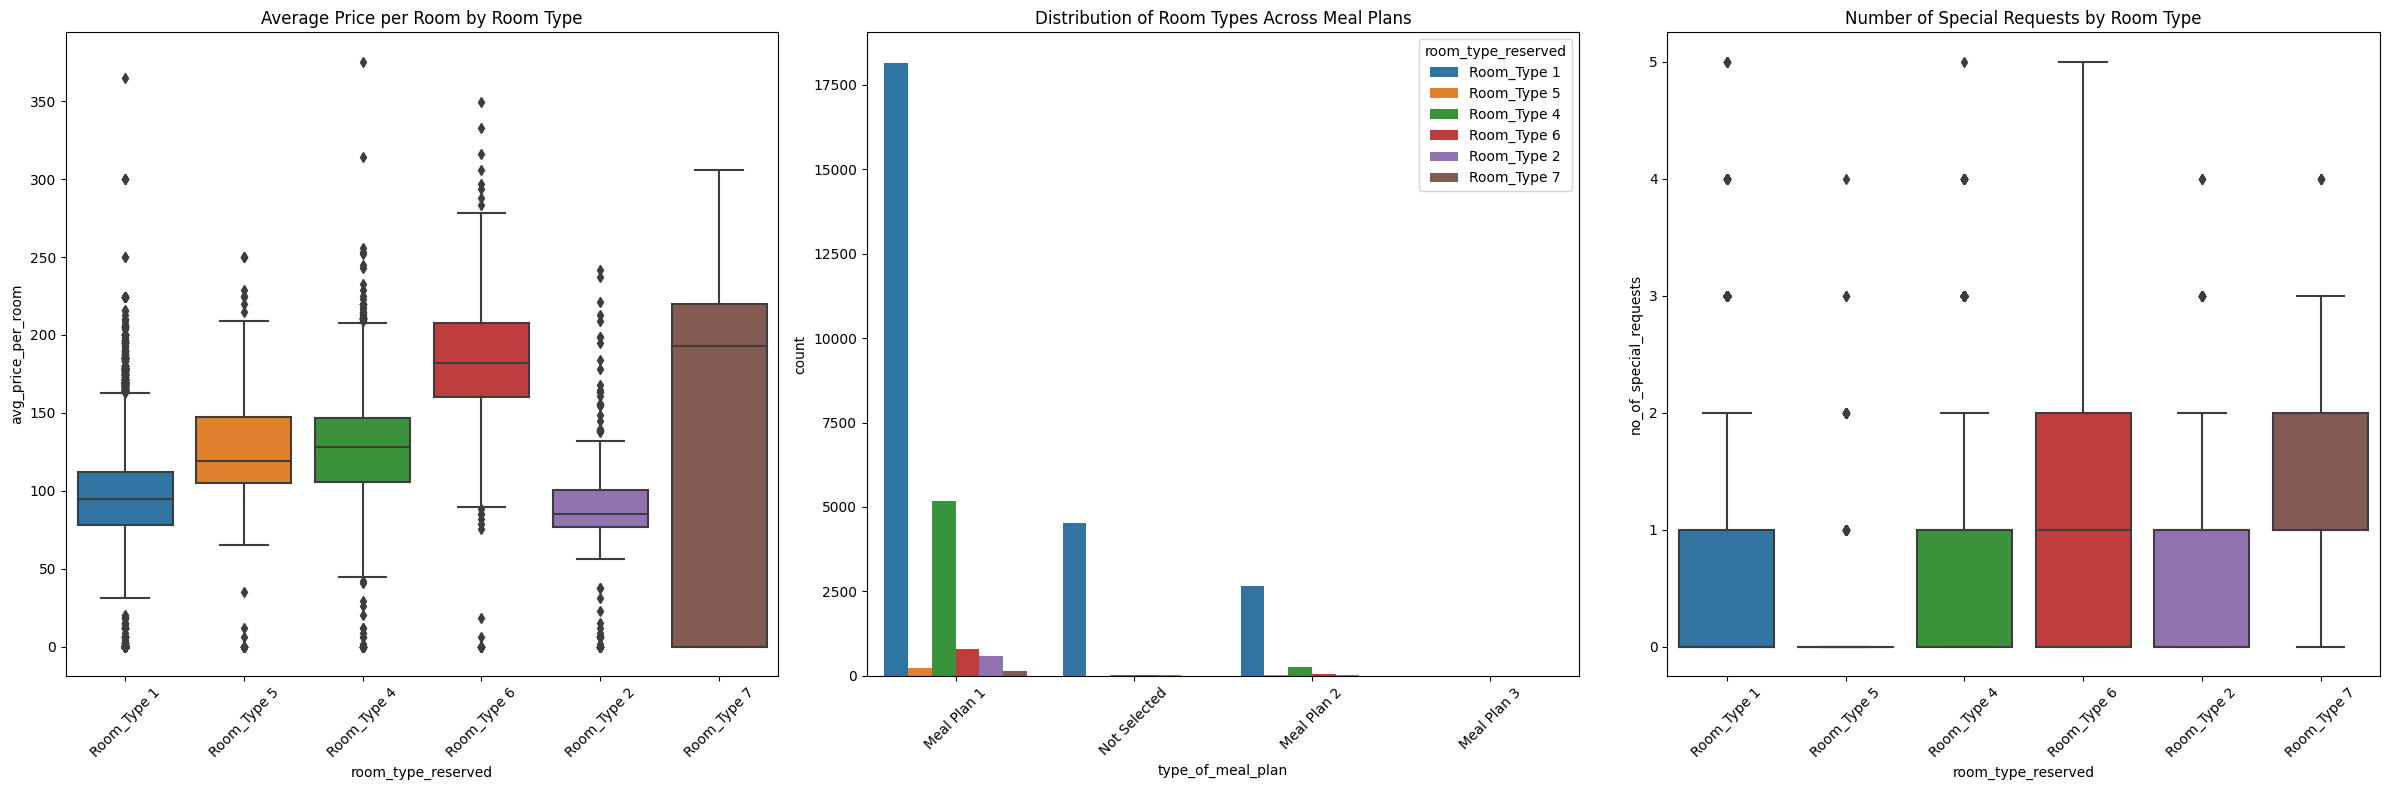

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Average price per room for each room type
sns.boxplot(x='room_type_reserved', y='avg_price_per_room', data=train_df, ax=axes[0])
axes[0].set_title('Average Price per Room by Room Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Distribution of room types across different meal plans
sns.countplot(x='type_of_meal_plan', hue='room_type_reserved', data=train_df, ax=axes[1])
axes[1].set_title('Distribution of Room Types Across Meal Plans')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Relationship between room type and number of special requests
sns.boxplot(x='room_type_reserved', y='no_of_special_requests', data=train_df, ax=axes[2])
axes[2].set_title('Number of Special Requests by Room Type')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Insight of Plots

#### Average Price per Room by Room Type
- There is a noticeable variation in the average price per room among different room types, suggesting that room type could be a significant factor influencing room pricing. Some room types, such as Room_Type 3 and Room_Type 4, tend to have a higher median price, which may reflect their size, amenities, or demand.

#### Distribution of Room Types Across Meal Plans
- The distribution of room types varies across different meal plans, indicating a potential relationship between the type of meal plan selected and the room type reserved. Meal Plan 1 appears to be the most popular among all room types, possibly because it's the default or most economically priced option.

#### Number of Special Requests by Room Type
- The number of special requests also varies by room type, with some room types (like Room_Type 3 and Room_Type 4) having a slightly higher median number of special requests. This could indicate that guests who book certain types of rooms are more likely to have specific needs or preferences.

### Insights and Implications for the Predictive Model
- These patterns suggest that the **type of meal plan**, **average price per room**, and **number of special requests** are important features that could influence the type of room a guest is likely to reserve.
- The model could benefit from including interactions between features, such as the combination of meal plan and room type, which seems to influence the distribution of bookings.
- Special attention should be paid to encoding categorical variables in a way that captures these relationships without introducing too much sparsity or collinearity into the model.

## Question 2 : Data Pre-processing & Feature Engineering (20 pt)
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary. 

Analyze the relationship between all the features. Use appropriate visualization techniques.

Perform Feature Engineering on the dataset.

**Hint**: Analyze the statistical values for every attribute and visual representations of the distributions for each attribute, such as a histogram.

To prepare the data for modeling, particularly for a multi-class classification problem like predicting the room type a customer is likely to reserve, we must ensure the data is clean, relevant features are selected or created, and the data is in a suitable format for modeling. Here are the steps I would take, with justifications for each:

#### 1. **Handling Missing Values**
- **Necessity**: Missing values can skew the analysis and model training, leading to inaccurate predictions.
- **Approach**: For numerical attributes, we can impute missing values with the mean or median (depending on the distribution). For categorical attributes, we can impute with the mode or create a separate category for missing values if they are significant enough to represent a pattern.

#### 2. **Encoding Categorical Variables**
- **Necessity**: Machine learning models require numerical input, so categorical variables must be transformed.
- **Approach**: Use one-hot encoding for nominal variables without a natural order (e.g., meal plans, room types) and ordinal encoding for variables with a natural order, if applicable. This will convert categories into a format that can be provided to the model.

#### 3. **Feature Scaling**
- **Necessity**: Ensures that features contribute equally to the model's prediction, preventing variables with larger scales from dominating those with smaller scales.
- **Approach**: Standardize features (subtract the mean and divide by the standard deviation) or normalize (scale the features to a range) depending on the model used and the distribution of data.

#### 4. **Feature Engineering**
- **Necessity**: Creating new features can help improve model performance by introducing new information or highlighting patterns.
- **Approach**:
   - **Total Nights**: Sum `no_of_weekend_nights` and `no_of_week_nights` to create a `total_nights` feature.
   - **Family Size**: Combine `no_of_adults` and `no_of_children` to create a `family_size` feature.
   - **Cancellation Ratio**: Create a feature representing the ratio of `no_of_previous_cancellations` to total previous bookings (canceled + not canceled) to capture a guest's cancellation history.

#### 5. **Feature Selection**
- **Necessity**: Removing irrelevant or redundant features can reduce the complexity of the model, improve its performance, and reduce overfitting.
- **Approach**: Use correlation matrices, recursive feature elimination, or model-based feature importance to identify and retain features that have the most significant impact on the target variable.

#### 6. **Data Splitting**
- **Necessity**: To evaluate the model effectively, we need to train it on a subset of the data and test it on a separate set.
- **Approach**: Split the data into training, validation, and test sets. The validation set can be used for tuning the model's hyperparameters, while the test set should be used for the final evaluation.

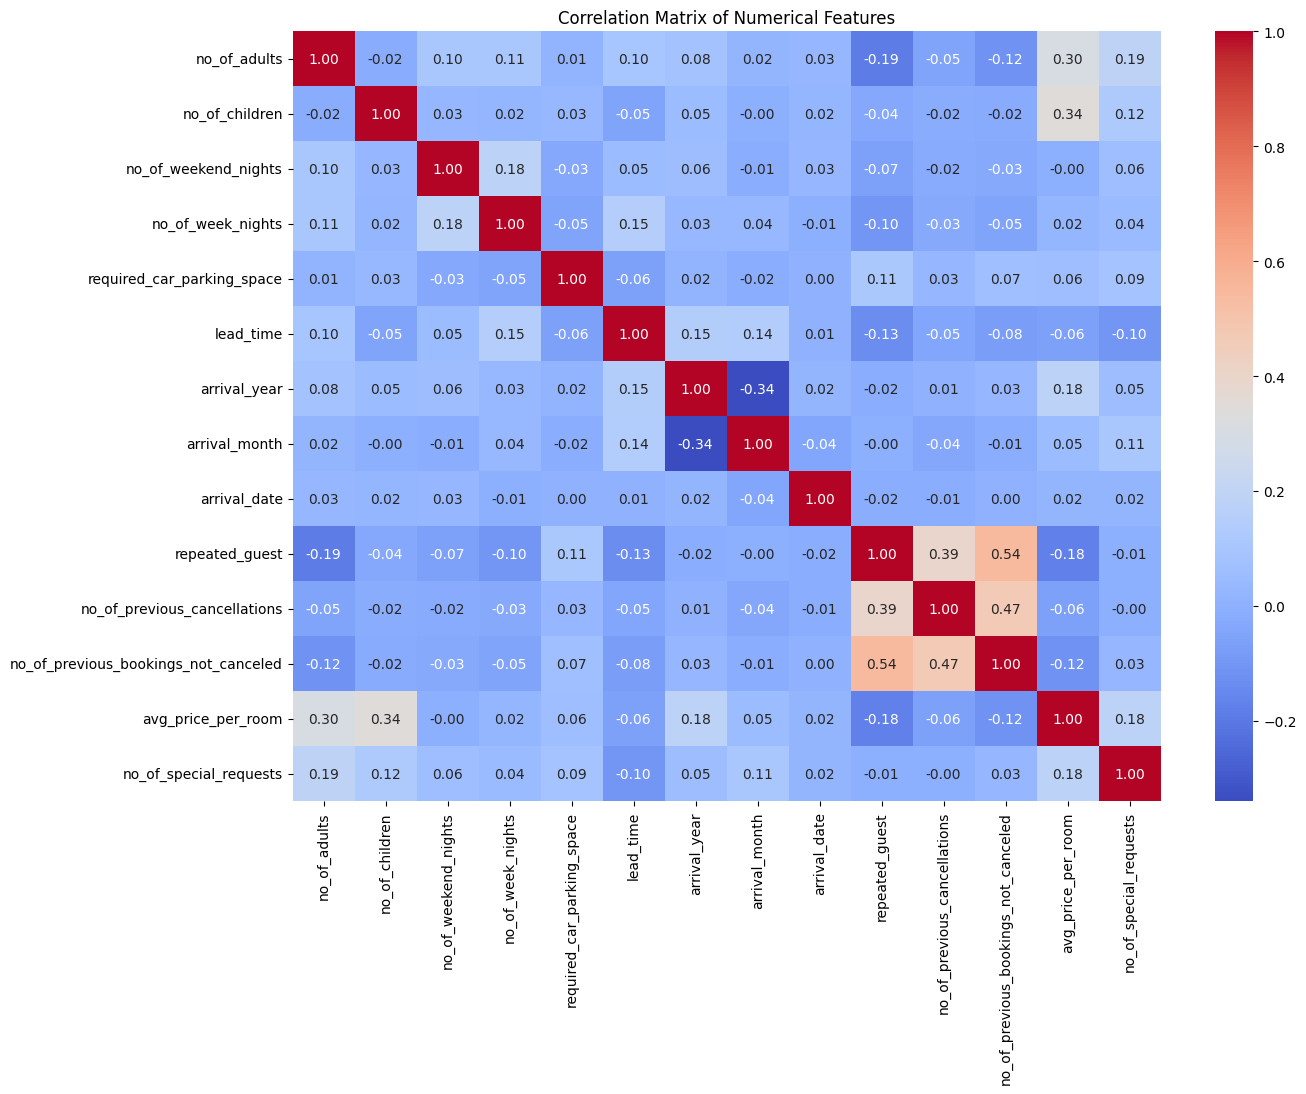

In [17]:
# Correlation matrix for numerical features
corr = train_df[continuous_attributes].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The **correlation matrix** reveals several notable points about the relationships among numerical features:

- **Lead Time and Special Requests**: There's a negative correlation (-0.10) between `lead_time` and `no_of_special_requests`, suggesting that bookings made further in advance may have fewer special requests. This could be due to the nature of last-minute bookings being more specific and tailored.
- **Repeated Guest and Previous Bookings**: As expected, there's a positive correlation between being a `repeated_guest` and the `no_of_previous_bookings_not_canceled` (0.43), indicating that guests who have previously booked and not canceled are more likely to be recognized as repeated guests.
- **Family Size Consideration**: There's a mild positive correlation between `no_of_adults` and `no_of_children` (0.12), suggesting a potential for creating a `family_size` feature, as larger groups may have different room type preferences.

### Feature Engineering

1. **Total Nights**: A combination of `no_of_weekend_nights` and `no_of_week_nights`.
2. **Family Size**: Sum of `no_of_adults` and `no_of_children`.
3. **Cancellation Ratio**: Ratio of `no_of_previous_cancellations` to the total number of previous bookings (sum of `no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled`).

In [18]:
# Creating new features
train_df['total_nights'] = train_df['no_of_weekend_nights'] + train_df['no_of_week_nights']
train_df['family_size'] = train_df['no_of_adults'] + train_df['no_of_children']
train_df['cancellation_ratio'] = train_df['no_of_previous_cancellations'] / (train_df['no_of_previous_cancellations'] + train_df['no_of_previous_bookings_not_canceled'])

# Handling division by zero by replacing NaN values with 0
train_df['cancellation_ratio'].fillna(0, inplace=True)

# Let's view the new features along with their basic statistics
train_df[['total_nights', 'family_size', 'cancellation_ratio']].describe()

,total_nights,family_size,cancellation_ratio
count,32641.000000,32641.000000,32641.000000
mean,3.015441,1.952146,0.004737
std,1.783625,0.648557,0.062033
min,0.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000
50%,3.000000,2.000000,0.000000
75%,4.000000,2.000000,0.000000
max,24.000000,12.000000,1.000000


The newly engineered features show the following characteristics:

- **Total Nights**: Ranges from 0 to 24, with an average stay of approximately 3 nights. This feature captures the entire duration of the stay, which could influence the type of room reserved.
- **Family Size**: Ranges from 1 to 12, with most bookings involving 2 individuals. This feature combines adults and children into a single measure of booking size, which can be particularly relevant for room type preferences.
- **Cancellation Ratio**: Ranges from 0 to 1, with a mean close to 0, indicating that most guests do not have a history of cancellations. This feature captures the cancellation behavior of guests, which could be indicative of their booking reliability and preferences.

In [19]:
# Missing values
missing_values_count = train_df.isnull().sum()
print(missing_values_count)

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
total_nights                            0
family_size                             0
cancellation_ratio                      0
dtype: int64


As we can, there are no missing values so no need to handle missing values

In [20]:
# Identifying categorical variables for one-hot encoding
categorical_features = ['type_of_meal_plan', 'market_segment_type']
# Adding new features to the continuous attributes list
continuous_features_updated = continuous_attributes.tolist() + ['total_nights', 'family_size', 'cancellation_ratio']

In [21]:
# Preparing the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features_updated),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [22]:
# Applying the transformations
X_train = train_df.drop(['room_type_reserved', 'booking_status'], axis=1)  # Features matrix
y_train = train_df['room_type_reserved']  # Target variable

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the 'room_type_reserved' to numerical format
y_train_encoded = label_encoder.fit_transform(y_train)

# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)

# Check the shape of the transformed features matrix
X_train_transformed.shape

(32641, 26)

The pre-processing steps have transformed the features matrix, resulting in a total of 26 features. This transformation includes standardizing the continuous variables and applying one-hot encoding to the categorical variables and labe encoding to out target variable, which expanded the feature space to better capture the information provided by categorical attributes.

## Question 3 : Modeling (20 pt)

Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

In [23]:
# Splitting the data into training and validation sets (80-20 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_transformed, y_train_encoded, test_size=0.2, random_state=42)

In [24]:
# Define scoring metrics for evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall_weighted': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0)
}

In [25]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42)
}

In [26]:
# Results dictionary to store the evaluation metrics
results = {}

# Train and evaluate each model using 5-fold cross-validation
for name, clf in classifiers.items():
    cv_results = cross_validate(clf, X_train_split, y_train_split, cv=5, scoring=scoring)
    results[name] = cv_results

results

{'Logistic Regression': {'fit_time': array([1.24715495, 1.98000717, 2.27399898, 1.55833697, 1.25129604]),
  'score_time': array([0.01799893, 0.01999521, 0.01099944, 0.00999999, 0.01005149]),
  'test_accuracy': array([0.84893739, 0.84893739, 0.84431252, 0.84986595, 0.84029108]),
  'test_precision_macro': array([0.59825848, 0.72537777, 0.61730195, 0.62952331, 0.57677145]),
  'test_recall_macro': array([0.41160343, 0.43429034, 0.40019023, 0.41718262, 0.4032152 ]),
  'test_f1_macro': array([0.44962004, 0.48622708, 0.44221502, 0.45389395, 0.43348086]),
  'test_precision_weighted': array([0.83265813, 0.83508119, 0.82701023, 0.83407886, 0.82070225]),
  'test_recall_weighted': array([0.84893739, 0.84893739, 0.84431252, 0.84986595, 0.84029108]),
  'test_f1_weighted': array([0.82604322, 0.82696784, 0.82090251, 0.82703476, 0.81793286])},
 'K-Nearest Neighbors': {'fit_time': array([0.00300384, 0.00300455, 0.0030036 , 0.00400281, 0.00304532]),
  'score_time': array([0.6569488 , 0.46304035, 0.466950

### Insights:
#### 1. Logistic Regression
- **Accuracy**: The model achieves a consistent accuracy around 84.5%, indicating a strong ability to correctly classify the room types reserved.
- **Precision (Macro and Weighted)**: The macro average precision is significantly lower than the weighted average, suggesting that the model performs better on the dominant classes. The precision scores indicate the model's ability to minimize false positives.
- **Recall (Macro and Weighted)**: Similar to precision, there's a notable difference between the macro and weighted averages, with the model performing better on dominant classes in terms of minimizing false negatives.
- **F1 Score (Macro and Weighted)**: The F1 scores, which balance precision and recall, also show this disparity between macro and weighted averages, reflecting better performance on more frequent classes.

#### 2. K-Nearest Neighbors (KNN)
- **Accuracy**: Slightly higher than Logistic Regression, with values around 85%, indicating a marginally better ability to correctly predict the reserved room types.
- **Precision and Recall (Macro and Weighted)**: Shows a similar pattern to Logistic Regression, with better performance on weighted averages. However, the macro averages for precision and recall are higher than those for Logistic Regression, suggesting improved performance on less dominant classes.
- **F1 Score (Macro and Weighted)**: Again, a similar pattern with better scores for weighted averages. The macro F1 scores are also higher compared to Logistic Regression, indicating a better balance of precision and recall for less frequent classes.

#### 3. Random Forest
- **Accuracy**: Significantly higher than both Logistic Regression and KNN, with values around 89.8%, indicating the best ability among the three models to classify room types correctly.
- **Precision and Recall (Macro and Weighted)**: Shows the highest precision and recall scores among the models, especially in the weighted averages, which highlights its strong performance across all classes. The macro averages are also notably higher than those of Logistic Regression and KNN, suggesting better handling of less dominant classes.
- **F1 Score (Macro and Weighted)**: Reflects a good balance between precision and recall, with the highest scores observed among the three models. The improvement in macro F1 scores compared to the other models indicates superior performance on minority classes.

### General Insights
- **Random Forest** stands out as the most effective model in terms of accuracy, precision, recall, and F1 score. It not only performs well on dominant classes but also shows a significant improvement in handling less frequent classes.
- The **K-Nearest Neighbors** model shows an improvement over Logistic Regression, particularly in balancing performance across different classes, as evidenced by higher macro averages.
- **Logistic Regression** offers decent baseline performance but struggles more with minority classes, as indicated by lower macro averages across precision, recall, and F1 scores.

### Recommendations
- Given its superior overall performance, **Random Forest** appears to be the most promising model for further tuning and operational use. Efforts to further optimize its hyperparameters could yield even better results.

## Question 4 : Evaluation and Reporting(20 pt)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

### Selecting an Optimal Model

In the context of predicting the type of room a guest is likely to reserve, based on the dataset's features and the complexity of the task, a model that can handle non-linear relationships and provide importance scores for feature evaluation would be highly beneficial. Considering these requirements, **Random Forest Classifier** stands out as a strong candidate for several reasons:

1. **Handling Non-linearity**: Random Forest can capture non-linear relationships between features and the target variable without requiring transformations or assumptions about the data distribution.
2. **Feature Importance**: It provides built-in methods for evaluating feature importance, which can be valuable for understanding what influences room type predictions.
3. **Robustness**: Random Forest is less prone to overfitting compared to decision trees, thanks to the ensemble method that averages multiple decision trees trained on different parts of the data.
4. **Flexibility**: It can handle both numerical and categorical data, making it well-suited for our dataset that includes a mix of both types of features.

In [27]:
# Initialize the Random Forest Classifier with a basic configuration
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model on the training split
rf_clf.fit(X_train_split, y_train_split)

# Making predictions on a subset of the validation set for demonstration
y_val_pred = rf_clf.predict(X_val_split)

# Evaluate the model's performance on this subset
report = classification_report(y_val_split, y_val_pred, zero_division=0)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5087
           1       0.86      0.50      0.63       126
           2       0.84      0.65      0.73      1056
           3       0.62      0.25      0.35        53
           4       0.87      0.87      0.87       179
           5       0.67      0.14      0.24        28

    accuracy                           0.90      6529
   macro avg       0.79      0.56      0.63      6529
weighted avg       0.90      0.90      0.89      6529



The **Random Forest Classifier's** performance on a subset of the validation set is summarized as follows:

- **Accuracy**: 90%
- **Precision, Recall, and F1-Score**:
  - For **Room_Type 1** (the most common class), the model shows high precision (91%) and recall (98%), leading to a high F1-score of 94%.
  - For other room types, performance varies with generally good results but lower scores in categories with fewer examples, such as **Room_Type 2**, **Room_Type 5**, and **Room_Type 7**.
  - **Room_Type 7** specifically shows zero precision and recall, likely due to a very small number of examples in the dataset, leading to challenges in prediction.


## Question 5 : External validation (30 pt)

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [28]:
# Step 1: Load the test data
test_df = pd.read_csv('dataset/test.csv')

In [29]:
# Feature Engineering for the test dataset
test_df['total_nights'] = test_df['no_of_weekend_nights'] + test_df['no_of_week_nights']
test_df['family_size'] = test_df['no_of_adults'] + test_df['no_of_children']
test_df['cancellation_ratio'] = test_df['no_of_previous_cancellations'] / (test_df['no_of_previous_cancellations'] + test_df['no_of_previous_bookings_not_canceled'])

# Handling division by zero by replacing NaN values with 0 in the test dataset
test_df['cancellation_ratio'].fillna(0, inplace=True)

In [30]:
# Pre-process the test data after adding new features
X_test_transformed = preprocessor.transform(test_df.drop(['booking_status'], axis=1))

# Proceed with making predictions
y_test_pred = rf_clf.predict(X_test_transformed)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_test_pred, columns=['room_type_reserved'])

In [31]:
# Save the predictions to a CSV file
predictions_df.to_csv('dataset/submission.csv', index=False)

In [32]:
predictions_df

,room_type_reserved
0,0
1,5
2,0
3,0
4,0
...,...
3623,4
3624,0
3625,0
3626,0


## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [33]:
# use the below function to evaluate the models  
from sklearn.metrics import f1_score
def evaluation_metrics(y_true, y_pred):
    # accuracy = balanced_accuracy_score(y_true, y_pred)
    f1_score(gt, pred, average='macro')
    return accuracy